# <font color='dark green'>Linear Regression</font>

* Linear regression analysis is used to predict the value of a variable based on the value of another variable.
* The variable you want to predict is called the <b>dependent</b> variable.
* The variable you are using to predict the other variable's value is called the <b>independent</b> variable.

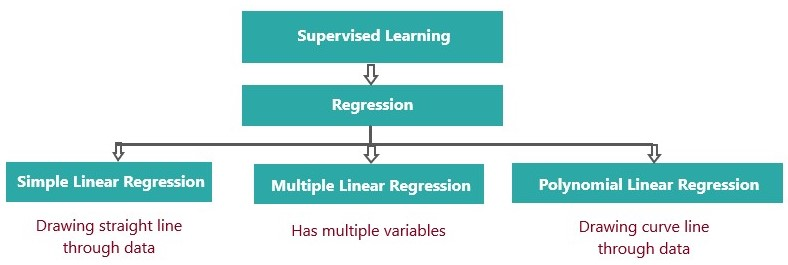

<br>

### <font color='green'>Example for Simple Linear Regression</font>

* Consider we need to find, based on the amount of rainfall how much would be the crop yield.

<b><font color='blue'>Independent variable</font></b>

* A variable whose <b>value does not change</b> by the effect of other variables and is used to <b>manipulate the dependent variable</b>.
* Denoted as <b>X</b>.
* Eg. <b>Rainfall</b> (We can't control the rain but the rain does control the crop yield).

<b><font color='blue'>Dependent variable</font></b>

* A variable whose <b>value change</b> when there is any <b>manipulation in the values of independent variables</b>.
* Denoted as <b>Y</b>.
* Eg. <b>Crop</b> (Crop yield depends on the amount of rainfall received).

<br>

### <font color='green'>Applications of Linear Regression</font>

<b><font color='sky blue'>1) Economic growth</font></b>
* To determine the economic growth of a country or a state in the coming quarter.
* To predict the GDP of a country.

<b><font color='sky blue'>2) Product price</font></b>
* To predict what would be the price of a product in the future.

<b><font color='sky blue'>3) Housing sales</font></b>
* To estimate the number of houses a builder would sell and at what price, in the coming months.

<b><font color='sky blue'>4) Score prediction</font></b>
* To predict the number of runs a player would score in the coming matches based on the previous performance.

<br>

### <font color='green'>Simple Linear Regression equation</font>

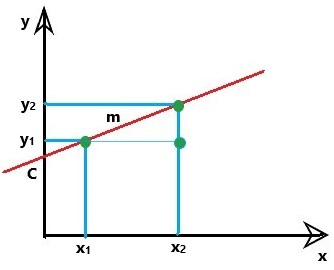

<b>y = m * x + c</b>

where,

y - dependent variable

x - independent variable

m - slope of the line

c - y-intercept of the line

* The distance between the actual and predicted values are known as <b>residuals</b> or <b>errors</b>.
* The best fit line should have the least sum of squares of these errors also known as <b>e square</b>.

### <font color='green'>Multiple Linear Regression equation</font>

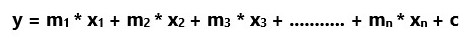

<br>

### <font color='crimson'>Sample Project for Multiple Linear Regression</font>

* Predicting profit of 1000 companies based on <b>R&D spend</b>, <b>Administration</b>, <b>Marketing spend</b>, <b>State</b> and <b>Profit</b>.

In [16]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Importing the dataset

companies = pd.read_csv('Profit_estimation.csv')

companies.head() #used to get the first 5 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
#Extracting the Independent and Dependent variables

x = companies.iloc[:, :-1].values  #X is Independent variable (R&D Spend, Administration, Marketing Spend, State)
y = companies.iloc[:, 4].values  #Y is Dependent variable (Profit)

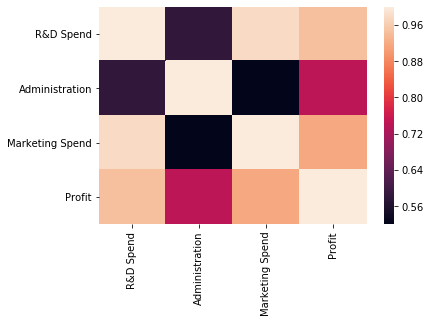

In [19]:
#Data visualisation
#Building the correlation matrix

sns.heatmap(companies.corr())

In [20]:
#Encoding categorical data, that is converting the categorical data into numerical data (State)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#LabelEncoder - Label Encoding refers to converting the labels into a numeric form 
#the States column have been replaced by the numbers 0, 1, 2...
#since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 < 2. But this isn’t the case at all. To overcome this problem, we use One-Hot Encoder
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3]) 

#After label encoding, the one-hot encoder splits the column into multiple columns. The numbers are replaced by 1s and 0s
onehotencoder = OneHotEncoder(categorical_features = [3])
x = onehotencoder.fit_transform(x).toarray()

#Here, we have 3 states (New York, California, Florida) so 3 new columns are introduced at first
print(x)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0027547e+05 2.4192631e+05
  2.2714282e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2845623e+05 3.2165214e+05
  2.8169232e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6118172e+05 2.7093986e+05
  2.9544217e+05]]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [21]:
#Avoiding the Dummy variable Trap
#The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms one variable can be predicted from the others.
#The solution to the dummy variable trap is to drop one of the categorical variables

x = x[:, 1:]

print(x)

[[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]
 ...
 [0.0000000e+00 0.0000000e+00 1.0027547e+05 2.4192631e+05 2.2714282e+05]
 [0.0000000e+00 0.0000000e+00 1.2845623e+05 3.2165214e+05 2.8169232e+05]
 [0.0000000e+00 1.0000000e+00 1.6118172e+05 2.7093986e+05 2.9544217e+05]]


In [22]:
#Splitting the data into Train and Test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

#test_size = 0.2 means 20% data is used for testing
#random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. 
#random_state=0 , we get the same train and test sets across different executions.

In [23]:
#Fitting Multiple Linear Regression model to Training set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#Predicting the Test set results

y_pred = regressor.predict(x_test)
print(y_pred)

[ 89790.61532915  88427.07187361  94894.67836972 175680.86725611
  83411.73042088 110571.90200074 132145.22936439  91473.37719686
 164597.05380606  53222.82667401  66950.19050989 150566.43987005
 126915.20858596  59337.8597105  177513.91053062  75316.28143051
 118248.14406603 164574.40699902 170937.2898107  182069.11645084
 118845.03252689  85669.95112229 180992.59396144  84145.08220145
 105005.83769214 101233.56772747  53831.07669091  56881.41475224
  68896.39346905 210040.00765883 120778.72270894 111724.87157654
 101487.90541518 137959.02649624  63969.95996743 108857.91214126
 186014.72531988 171442.64130747 174644.26529205 117671.49128195
  96731.37857433 165452.25779409 107724.34331255  50194.54176913
 116513.89532179  58632.4898682  158416.4682761   78541.48521609
 159727.66671743 131137.87699644 184880.70924516 174609.0826688
  93745.66352059  78341.13383418 180745.9043908   84461.61490552
 142900.90602903 170618.44098397  84365.09530839 105307.3716218
 141660.07290787  52527.343

In [25]:
#Calculating the Coefficients
#Coefficients are the values that multiply the predictor values. 
#y=mx+c where +3 is the coefficient, X is the predictor, and +5 is the constant

print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [26]:
#Calculating the Intercept
#The constant term is also known as the y intercept, it is simply the value at which the fitted line crosses the y-axis.

print(regressor.intercept_)

-51035.22972402591


In [27]:
#Calculating the R squared value
#R squared score is used to evaluate the performance of a linear regression model
#R squared score best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

# R squared value of 0.91 proves the model is a good model

0.9112695892268863

<br>
<br>
<br>
<br>
<br>
<b>Reference</b>

https://www.youtube.com/watch?v=NUXdtN1W1FE&list=PLEiEAq2VkUULNa6MHQAZSOBxzB6HHFXj4